In [1]:
from seleniumextractor import SeleniumExtractor
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
from decimal import *
from selenium_error import *
from configReader_WLUSA import configReader_WLUSA
import random
import logging
import logging.config
import sys
import pandas as pd
import datetime as dt
import time
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
current_date = dt.datetime.today().strftime("%m%d%Y")

In [3]:
def _get_config(property):
    return(configReader_WLUSA.get_setting(property))
    return(configReader_WLUSA.get_setting(property))

marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")

In [4]:
file_path = "C://Users//Sonam//Downloads//chromedriver_win32" + "//"
wl_file_path = "C://Users//Sonam//OneDrive//Documents//watchlists//usa"+"//"

In [5]:
marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")
selextractor = SeleniumExtractor(marketinout_loginurl)
elem = selextractor.get_elem_by_id("l")
elem.send_keys(marketinout_username)
elem = selextractor.get_elems_by_class("button")[0].click()

In [6]:
_match_xpath = _get_config("match_xpath")
_minervini = _get_config("minervini")
_minervini_download_fn = _get_config("minervini_fn")
_1_month = _get_config("1_month")
_1_month_fn = _get_config("1_month_fn")
_3_month = _get_config("3_month")
_3_month_fn = _get_config("3_month_fn")
_6_month = _get_config("6_month")
_6_month_fn = _get_config("6_month_fn")


In [7]:
def get_scanner_details(url,selextractor,csv_file_name):
    selextractor.driver.get(url)
    selextractor.driver.get("https://www.marketinout.com/stock-screener/csv_stocks.csv")
    #insert a wait here for few seconds for the file to be downlaoded
    time.sleep(3)
    df = pd.read_csv("C://Users//Sonam//Downloads//chromedriver_win32" + "//" + csv_file_name)
    return df
    

In [8]:
def generate_sectorData(wl_url,sel,file_name):
    df = get_scanner_details(wl_url,sel,file_name)
    os.remove(file_path+file_name)
    return df

In [9]:
df = generate_sectorData(_1_month,selextractor,_1_month_fn)
df2 = generate_sectorData(_3_month,selextractor,_3_month_fn)
df3 = generate_sectorData(_6_month,selextractor,_6_month_fn)

In [10]:
df3

,Symbol,Name,Industry,Sector,Exchange,Cap mln,Last,Change,Change %,Volume,...,3wtc,Atr_percent,Rs,Ti65,Adr,Advol,Percent_float,10wmadist,Sellvolatility,Volcomp
0,NINE,Nine Energy Service Inc,Oil & Gas Equipment & Services,Energy,NYSE,478.05,16.35,0.16,0.99,2056955,...,0,7.82,99.98,1.5700,10.86,24.36,76.88,41.33,13.35,14.35
1,CABA,Cabaletta Bio Inc,Biotechnology,Healthcare,NASDAQ,271.01,10.02,0.70,7.51,644008,...,0,11.28,99.98,1.9800,15.91,7.64,86.20,56.66,1.62,91.74
2,YPF,YPF S.A. ADR,Oil & Gas Integrated,Energy,NYSE,7200.00,11.08,0.73,7.05,4380635,...,0,4.36,99.96,1.2300,5.12,22.19,99.93,30.12,37.95,14.68
3,MSC,Studio City International Holdings Ltd ADR,Resorts & Casinos,Consumer Cyclical,NYSE,1750.00,7.45,-0.30,-3.87,58377,...,0,12.62,99.94,2.0100,15.38,0.53,100.00,63.59,35.36,63.86
4,HLX,Helix Energy Solutions Group Inc,Oil & Gas Equipment & Services,Energy,NYSE,1130.00,7.93,0.03,0.38,1556135,...,0,4.49,99.92,1.1900,5.37,13.19,93.84,16.62,-10.91,56.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,CRDO,Credo Technology Group Holding Ltd,Communication Equipment,Technology,NASDAQ,1940.00,14.74,0.80,5.74,1535294,...,0,4.64,90.17,0.9888,5.11,13.92,61.31,4.57,6.76,85.98
145,NEO,NeoGenomics Inc,Diagnostics & Research,Healthcare,NASDAQ,1260.00,10.98,0.60,5.78,609882,...,0,5.81,90.09,1.0600,6.10,10.62,95.80,4.85,35.01,55.70
146,BCYC,Bicycle Therapeutics Ltd ADR,Biotechnology,Healthcare,NASDAQ,931.01,27.83,-0.57,-2.01,259501,...,0,7.14,89.93,1.0600,6.54,6.51,96.90,-6.19,64.62,53.23
147,ICVX,Icosavax Inc,Biotechnology,Healthcare,NASDAQ,339.15,10.46,0.61,6.19,378242,...,0,11.63,89.70,1.8300,19.37,30.12,66.09,65.22,8.75,96.82


In [11]:
df_filtered = df[df['Rs'] > 89 ]
df_filtered2 = df2[df2['Rs'] > 89 ]
df_filtered3 = df3[df3['Rs'] > 89 ]

In [12]:
df_filtered

,Symbol,Name,Industry,Sector,Exchange,Cap mln,Last,Change,Change %,Volume,...,Ti65,Adr,Advol,Percent_float,Roc,Weekly_ib,3wtc,10wmadist,Sellvolatility,Volcomp
0,MDGL,Madrigal Pharmaceuticals Inc,Biotechnology,Healthcare,NASDAQ,5100.00,299.98,-0.86,-0.29,472065,...,2.280,8.52,288.4100,69.56,371.96,0.0,0,91.19,-11.35,87.11
1,CPS,Cooper-Standard Holdings Inc,Auto Parts,Consumer Cyclical,NYSE,200.51,12.30,-1.96,-13.74,605429,...,1.580,10.48,2.8700,97.55,86.93,0.0,0,50.64,25.77,0.00
2,STG,Sunlands Technology Group ADR,Education & Training Services,Consumer Defensive,NYSE,146.01,11.18,0.68,6.48,52525,...,1.750,11.19,0.2268,28.83,85.71,0.0,0,67.97,-17.93,81.97
3,NINE,Nine Energy Service Inc,Oil & Gas Equipment & Services,Energy,NYSE,478.05,16.35,0.16,0.99,2056955,...,1.570,10.86,24.3600,76.88,86.64,0.0,0,41.33,13.35,14.35
4,HUYA,HUYA Inc ADR,Entertainment,Communication Services,NYSE,1170.00,5.37,0.53,10.95,2562895,...,1.740,11.26,16.5800,34.76,89.08,0.0,0,57.02,-17.48,19.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,PLRX,Pliant Therapeutics Inc,Biotechnology,Healthcare,NASDAQ,940.08,23.44,-0.19,-0.80,886386,...,0.998,6.06,9.1500,81.89,25.21,0.0,0,20.26,198.81,0.00
100,TXG,10x Genomics Inc,Health Information Services,Healthcare,NASDAQ,4710.00,43.22,1.51,3.62,1411766,...,1.190,7.13,47.7400,74.78,23.13,0.0,0,15.68,28.87,31.29
101,CENX,Century Aluminum Co,Aluminum,Basic Materials,NASDAQ,939.96,10.01,0.13,1.32,884200,...,1.220,7.03,15.8600,85.16,24.19,0.0,0,15.96,-26.68,50.71
102,PMTS,CPI Card Group Inc,Credit Services,Financial Services,NASDAQ,432.65,35.01,-0.40,-1.13,55069,...,1.370,8.32,2.4700,37.40,24.37,0.0,0,17.65,-17.68,32.99


C:\Users\Sonam\anaconda3\envs\IBKR_2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Sector by 1 Month'}, ylabel='Sector'>

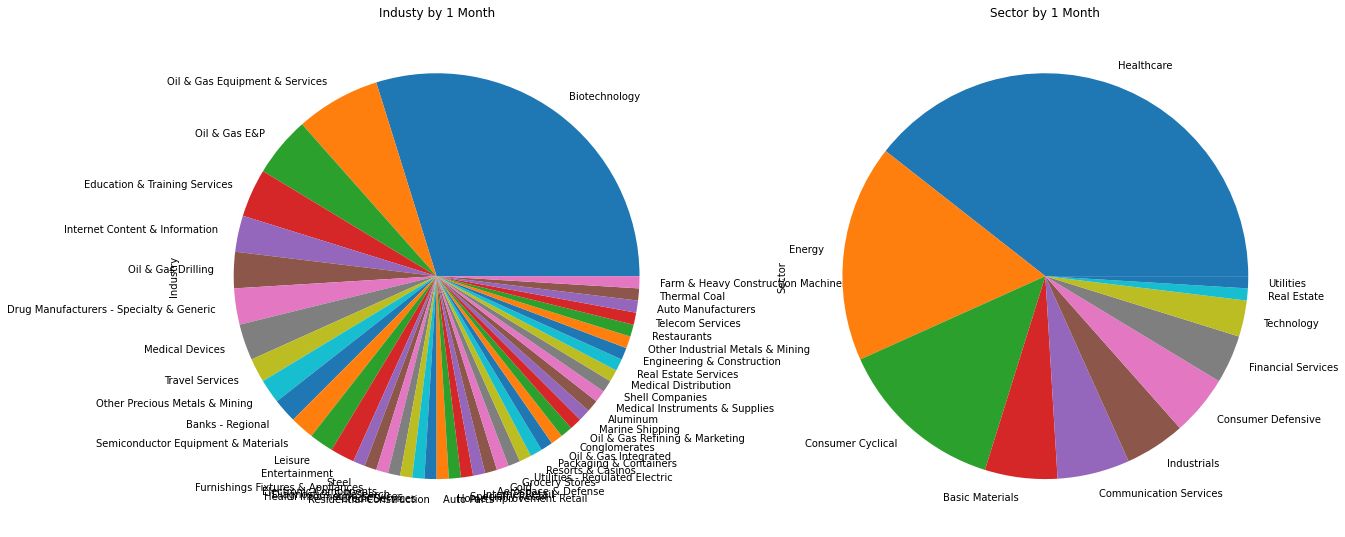

In [13]:
fig, axs = plt.subplots(1,2,figsize=(20, 20))
df_filtered['Industry'].value_counts().plot(kind='pie',ax = axs[0],title='Industy by 1 Month')
df_filtered['Sector'].value_counts().plot(kind='pie',ax = axs[1],title='Sector by 1 Month')



<AxesSubplot:title={'center':'Sector by 3 Month'}, ylabel='Sector'>

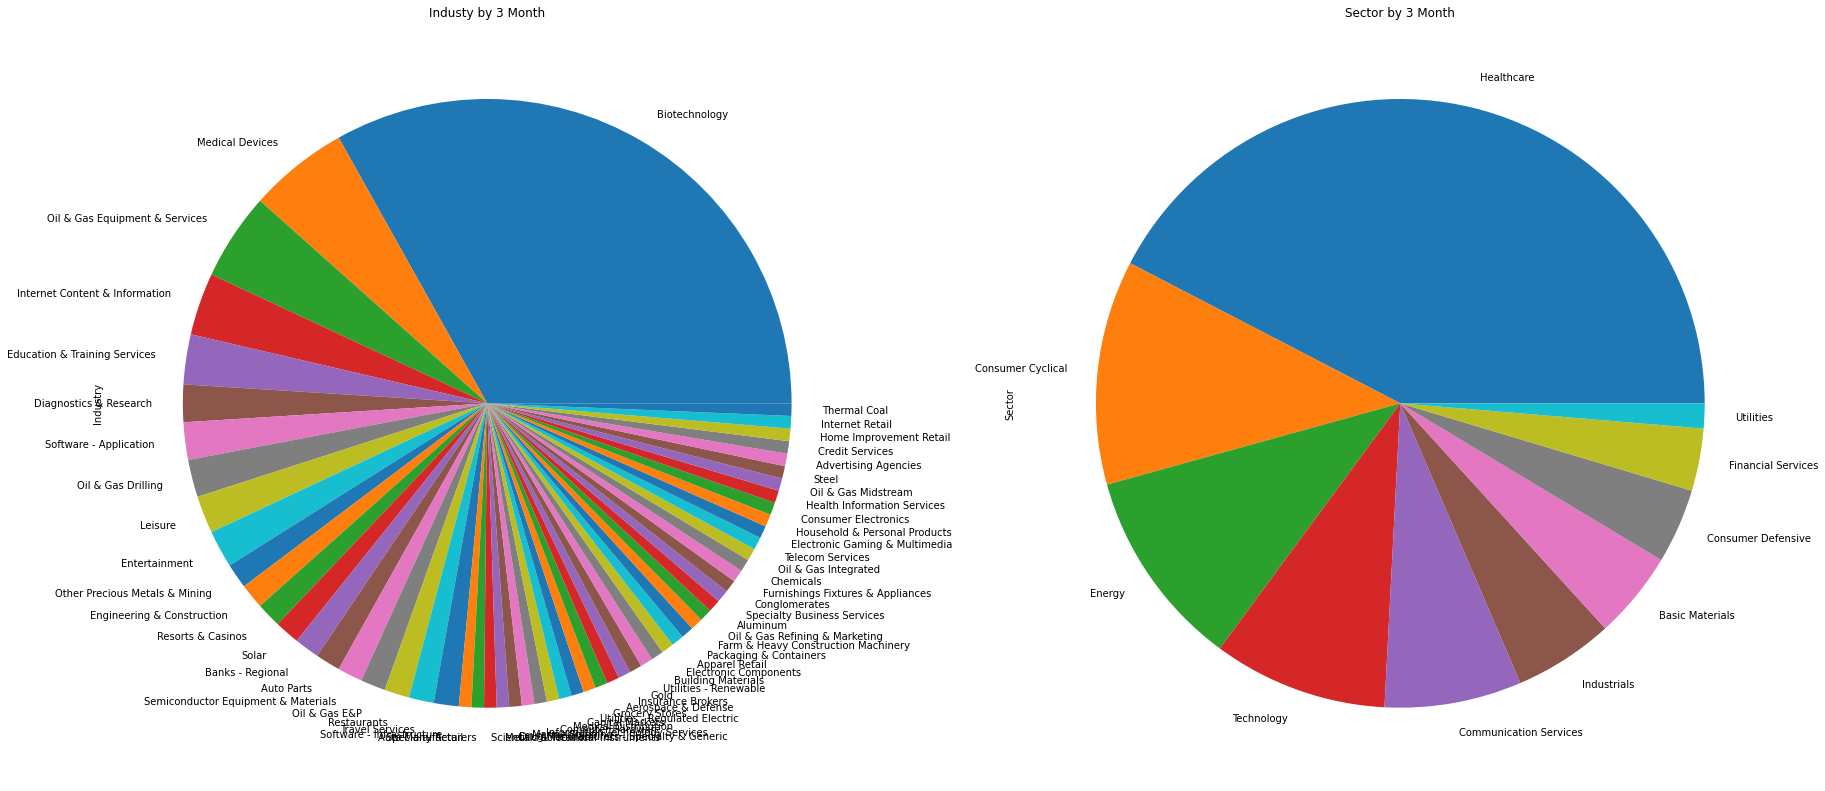

In [14]:
fig, axs = plt.subplots(1,2,figsize=(30, 30))
df_filtered2['Industry'].value_counts().plot(kind='pie',ax = axs[0],title='Industy by 3 Month')
df_filtered2['Sector'].value_counts().plot(kind='pie',ax = axs[1],title='Sector by 3 Month')





<AxesSubplot:title={'center':'Sector by 6 Month'}, ylabel='Sector'>

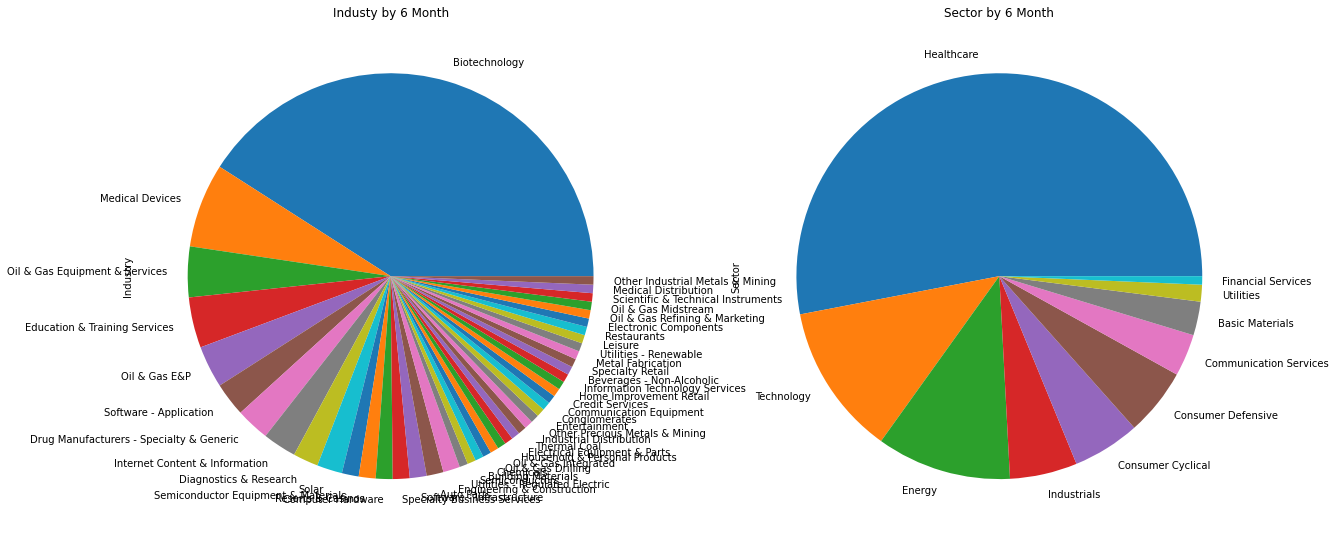

In [15]:
fig, axs = plt.subplots(1,2,figsize=(20, 20))
df_filtered3['Industry'].value_counts().plot(kind='pie',ax = axs[0],title='Industy by 6 Month')
df_filtered3['Sector'].value_counts().plot(kind='pie',ax = axs[1],title='Sector by 6 Month')
